# Importing the dataset

In [1]:
import pandas as pd
file = "C:/Users/seerl/Downloads/news.csv"
df = pd.read_csv(file)
df.head(30)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


# Checking for null values

In [2]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [3]:
# THE STOP WORDS IN MY DATASET ARE THE STOPWORDS THAT ARE LISTED IN THE stopwords PACKAGE
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'she', 'will', 'these', 'your', 'being', "don't", 'until', 'as', 'our', 'how', 'too', 'before', 'some', "mustn't", 'shan', 'm', 'all', 'had', 'o', 'him', 'its', 'isn', 'up', 'll', 'more', 'what', 'can', 'am', 'between', 'doing', 'any', 'ma', 'to', 'd', 'been', 'which', 'did', "couldn't", 'do', "weren't", 'by', 'yours', 'very', 'who', 'about', 'both', 'this', 'while', 'when', 'i', "wouldn't", "shouldn't", "she's", 'them', 'whom', 'here', 'herself', 'does', 'mustn', 'wouldn', 'was', 'the', 'down', "doesn't", 'now', 'y', 'itself', 'further', 'off', 'yourselves', 'he', 'should', 'those', "mightn't", "hasn't", 'be', 'on', 'in', 'own', 'you', 'having', 'than', 'once', 'are', 'below', "you're", 'with', 'and', 're', 'weren', 'theirs', 'have', 'other', 'won', "didn't", "you've", 'where', "won't", 'her', 'each', 'during', 'myself', 'such', 'is', "it's", 'why', 'after', 'aren', 'hasn', 'ourselves', 'his', 'has', 'out', 'same', 've', "that'll", 'that', 'against', 'for', 'but', 'their', 'at', 'if'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seerl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Question 1: Removing stop words

In [4]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


    
    return text

# THIS IS AN EXAMPLE STRING WHICH IS SIMILAR TO THE STRINGS PRESENT IN THE DATASET
testTokens = tokenize("My name is Monkey.D.Luffy and I am going to be the king of the pirates!")
print(testTokens)

cleanTokens = remove_stop(testTokens)
print(cleanTokens)

# STOP WORDS ARE REMOVED FROM THE TEXT THAT WE ENTERED

['My', 'name', 'is', 'Monkey', 'D', 'Luffy', 'and', 'I', 'am', 'going', 'to', 'be', 'the', 'king', 'of', 'the', 'pirates']
['name', 'Monkey', 'Luffy', 'going', 'king', 'pirates']


# Question 2: Statistical Operations

In [5]:
# CREATING A PIPELINE
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [6]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('trump', 22057), ('said', 21204), ('clinton', 17342), ('would', 12722), ('people', 11730)]


In [7]:
#In this step we are putting the frequencies of the tokens in a data frame so that we can get their statistics.
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [8]:
freq_df.describe()

,freq
count,78978.000000
mean,34.281787
std,249.834168
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,22057.000000


# Question 2: Plots

<AxesSubplot:>

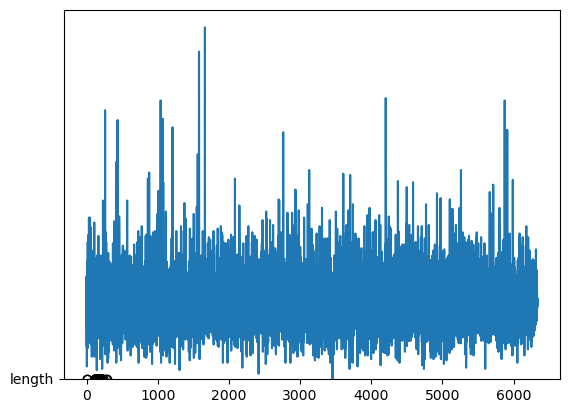

In [9]:
# BOX PLOT for length od keyword_1
df['length'] = df['title'].str.len()
df['length'].plot()
df['length'].plot(kind='box', vert=False)

<AxesSubplot:ylabel='Frequency'>

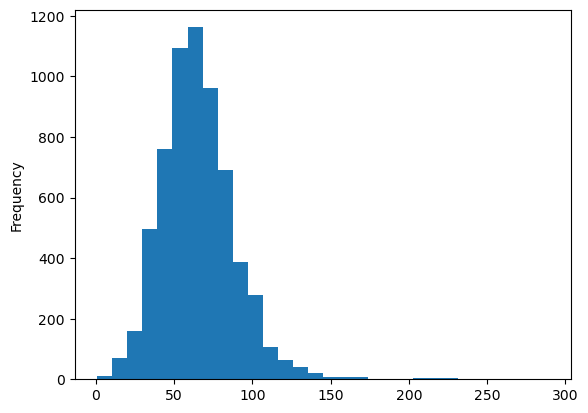

In [10]:
# HISTOGRAM PLOT for length of keyword_1
df['length'].plot(kind='hist', bins=30)

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

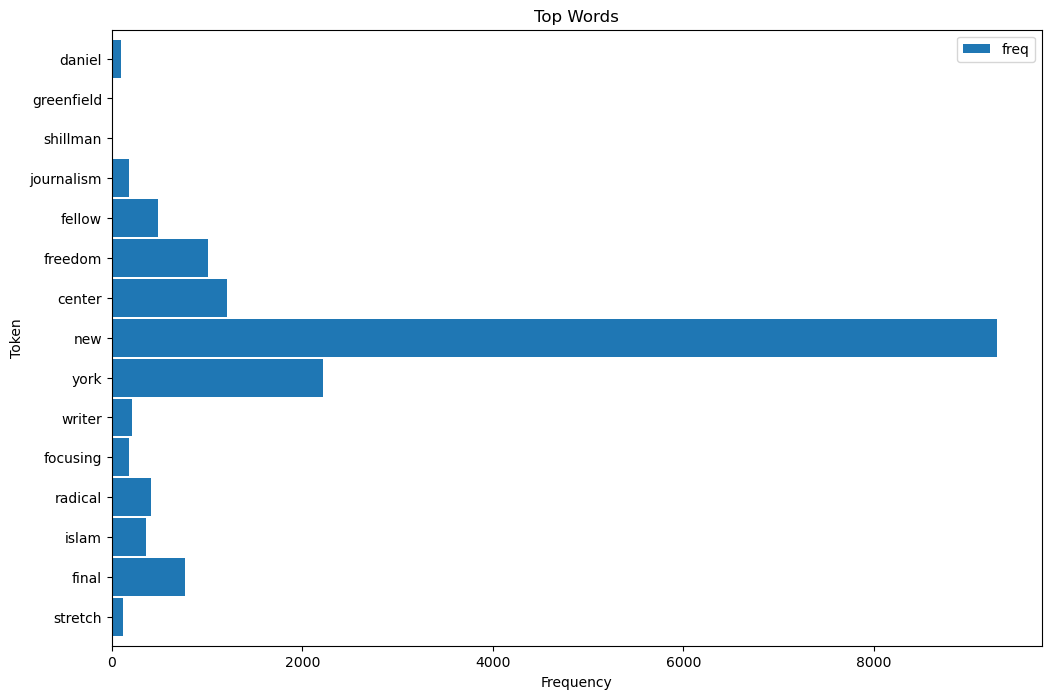

In [11]:
# BAR GRAPH FOR THE TOKENS THAT WE CREATED EARLIER
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# Question 3: Pipeline

In [12]:
# CREATING A PIPELINE
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [13]:
# RUNNING THE PIPELINE
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df['tokens']

#STOP WORDS ARE REMOVED FROM THE keyword_1 COLUMN OF THE DATASET

0       [daniel, greenfield, shillman, journalism, fel...
1       [google, pinterest, digg, linkedin, reddit, st...
2       [u, secretary, state, john, f, kerry, said, mo...
3       [kaydee, king, kaydeeking, november, lesson, t...
4       [primary, day, new, york, front-runners, hilla...
                              ...                        
6330    [state, department, told, republican, national...
6331    [p, pbs, stand, plutocratic, pentagon, posted,...
6332    [anti-trump, protesters, tools, oligarchy, ref...
6333    [addis, ababa, ethiopia, president, obama, con...
6334    [jeb, bush, suddenly, attacking, trump, matter...
Name: tokens, Length: 6335, dtype: object

# Question 3: Word Frequency Analysis

In [14]:
# WE CALCULATED THE FREQUENCY OF THE TOKENS AND SORTED THEM IN DESCENDING ORDER
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
trump,22057
said,21204
clinton,17342
would,12722
people,11730
one,11379
new,9298
state,8809
president,8595


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

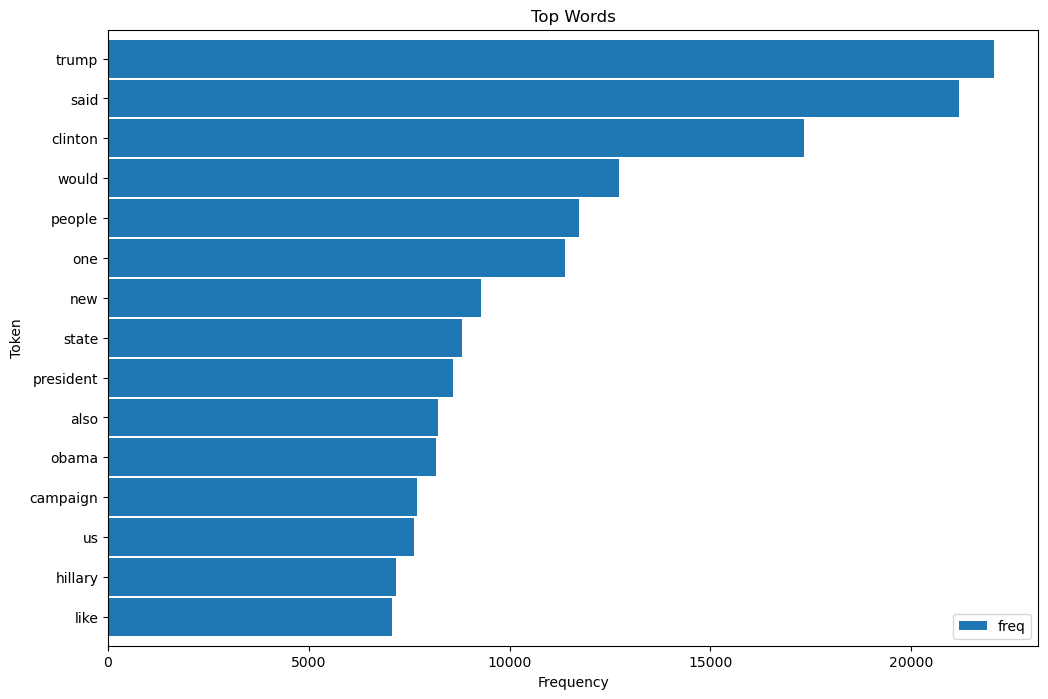

In [15]:
# WE ARE PLOTTING THE BAR GRAPH FOR THE SORTED TOKENS
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# Question 3: Word Cloud

(-0.5, 399.5, 199.5, -0.5)

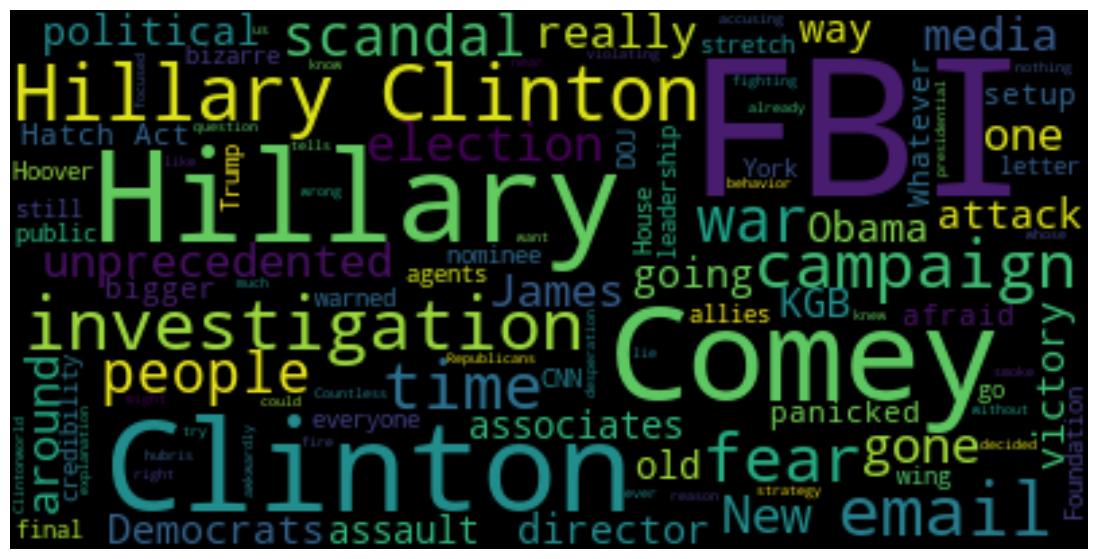

In [16]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("label =='FAKE'")['text'].values[0]

plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


# Question 4: Random regex strings

In [83]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*.org', text)

def tokenize1(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*@*[\w-]*.com', text)

def tokenize2(text):
    return re.findall(r'www.[\w-]*', text)

def tokenize3(text):
    return re.findall(r'[a-z|A-Z][\w-]*', text)

def tokenize4(text):
    return re.findall(r'[a-z|A-Z][\w-]*', text)

# This returns only .org extension websites
x = tokenize("phaneshraj.com develop.org initiate.org github.com")

# This returns email ids present in input
x1 = tokenize1("my email is kryptonian@gmail.com")

# This returns only valid www starting websites
x2 = tokenize2("www.google.com  https:\\w.google  http:\\google.com  ww.movierulz2.co")

#This removes all special characters, numbers from the beginning of words
x3 = tokenize3("1Value  _val  _temp  @temp  temp  value")




print(x)
print(x1)
print(x2)
print(x3)


['develop.org', 'initiate.org']
['kryptonian@gmail.com']
['www.google']
['Value', 'val', 'temp', 'temp', 'temp', 'value']


In [79]:
import regex as re
def tokenize(text):
    return re.findall(r'Bye$', text)
x = tokenize("They said goodBye")
print(x)
y= tokenize("He said goodBye ")
print(y)


['Bye']
[]


# Question 5: Sentiment Analysis

In [49]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [50]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [62]:
# I TOOK TECHNOLOGY SUBREDDIT CHANNEL

headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Facebook cofounder accuses Tesla of being the next 'Enron'
1cecx3s
Moonskaraos
1714219365.0
4776
0.91
https://www.businessinsider.com/asana-ceo-dustin-moskovitz-tesla-accusations-enron-sec-2024-4
0


In [63]:
headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

560


In [64]:
tech_df = pd.DataFrame(headlines)
tech_df.head()

,0
0,"Boston Dynamics Atlas robot, 2013-2024"
1,Japan readies antitrust action against Google ...
2,Tiny Texas City Repels Russia-Tied Hackers Eye...
3,Democracy Dies Behind Paywalls
4,Cops can force suspect to unlock phone with th...


In [65]:
tech_df.head()

,0
0,"Boston Dynamics Atlas robot, 2013-2024"
1,Japan readies antitrust action against Google ...
2,Tiny Texas City Repels Russia-Tied Hackers Eye...
3,Democracy Dies Behind Paywalls
4,Cops can force suspect to unlock phone with th...


In [66]:
tech_df.columns

RangeIndex(start=0, stop=1, step=1)

In [67]:
tech_df.columns = ['Titles']

In [68]:
tech_df.head()

,Titles
0,"Boston Dynamics Atlas robot, 2013-2024"
1,Japan readies antitrust action against Google ...
2,Tiny Texas City Repels Russia-Tied Hackers Eye...
3,Democracy Dies Behind Paywalls
4,Cops can force suspect to unlock phone with th...


In [69]:
tech_df.Titles.duplicated().sum()

0

In [70]:
#Clean the text

# THIS FUNCTION CLEANS THE DATA
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# CLEANING THE DATA
tech_df["Titles"]= tech_df["Titles"].apply(cleanTxt)

# SHOWING CLEAN DATA
tech_df.head()

,Titles
0,"Boston Dynamics Atlas robot, 2013-2024"
1,Japan readies antitrust action against Google ...
2,Tiny Texas City Repels Russia-Tied Hackers Eye...
3,Democracy Dies Behind Paywalls
4,Cops can force suspect to unlock phone with th...


In [71]:
# REMOVING EMOJI AND UNICODE FROM THE SCRPPED DATA
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# CLEANING THE TEXT
tech_df["Titles"]= tech_df["Titles"].apply(remove_emoji)

# SHOWING THE CLEANED TEXT
tech_df.head()

,Titles
0,"Boston Dynamics Atlas robot, 2013-2024"
1,Japan readies antitrust action against Google ...
2,Tiny Texas City Repels Russia-Tied Hackers Eye...
3,Democracy Dies Behind Paywalls
4,Cops can force suspect to unlock phone with th...


In [72]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [74]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
tech_df['Subjectivity'] = tech_df['Titles'].apply(getSubjectivity)
tech_df['Polarity'] = tech_df['Titles'].apply(getPolarity)

#Now display data
tech_df.head()

,Titles,Subjectivity,Polarity
0,"Boston Dynamics Atlas robot, 2013-2024",0.0,0.0
1,Japan readies antitrust action against Google ...,0.1,0.1
2,Tiny Texas City Repels Russia-Tied Hackers Eye...,0.5,0.0
3,Democracy Dies Behind Paywalls,0.7,-0.4
4,Cops can force suspect to unlock phone with th...,0.0,0.0


In [76]:
# GROUPING THE DATA INTO THREE CATEGORIES FOR SENTIMENT ANALYSIS
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
tech_df["Insight"] = tech_df["Polarity"].apply(getInsight)

tech_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Boston Dynamics Atlas robot, 2013-2024",0.000000,0.000000,Neutral
1,Japan readies antitrust action against Google ...,0.100000,0.100000,Positive
2,Tiny Texas City Repels Russia-Tied Hackers Eye...,0.500000,0.000000,Neutral
3,Democracy Dies Behind Paywalls,0.700000,-0.400000,Negative
4,Cops can force suspect to unlock phone with th...,0.000000,0.000000,Neutral
5,Half of online traffic in 2024 generated by bo...,0.166667,-0.166667,Negative
6,British intelligence moves to protect research...,0.000000,0.000000,Neutral
7,Industrial robots make people feel worse about...,0.600000,-0.400000,Negative
8,Apple Cuts Vision Pro Shipments As Demand Fall...,0.750000,-0.125000,Negative
9,Ubisoft is removing The Crew from libraries fo...,0.050000,0.000000,Neutral


In [77]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

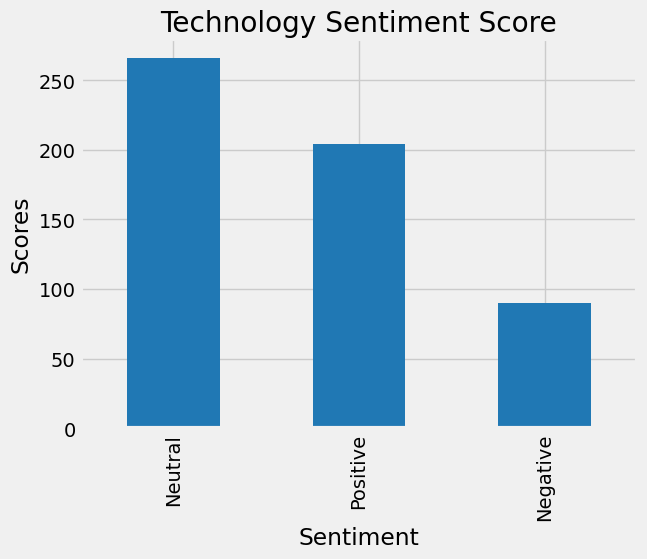

In [78]:
#Plot the values count of sentiment
plt.title("Technology Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
tech_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()